In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
hr=pd.read_csv("hrdata.csv")
hr

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


**shape**

In [22]:
hr.shape

(54808, 14)

**size**

In [23]:
hr.size

767312

In [224]:
num_columns

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

**data_types**

In [24]:
hr.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

**isnull**

In [25]:
hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [26]:
hr[['education']]
# hr[['previous_year_rating']]

,education
0,Master's & above
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Bachelor's
...,...
54803,Bachelor's
54804,Master's & above
54805,Bachelor's
54806,NaN


In [27]:
education_mode=hr['education'].mode()
hr['education'].fillna(education_mode[0],inplace=True)

previous_year_rating_mode=hr['previous_year_rating'].mode()
hr['previous_year_rating'].fillna(previous_year_rating_mode[0],inplace=True)

C:\Users\mahen\AppData\Local\Temp\ipykernel_8196\3305868429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr['education'].fillna(education_mode[0],inplace=True)
C:\Users\mahen\AppData\Local\Temp\ipykernel_8196\3305868429.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

**check the columns**

In [28]:
hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

**dividing data into numerical and categorical**

In [31]:
data_types=hr.dtypes

In [32]:
cat_columns=[]
num_columns=[]
for i,j in dict(data_types).items():
    if j=='object':
        cat_columns.append(i)
    else:
        num_columns.append(i)
cat_columns,num_columns
        

(['department', 'region', 'education', 'gender', 'recruitment_channel'],
 ['employee_id',
  'no_of_trainings',
  'age',
  'previous_year_rating',
  'length_of_service',
  'KPIs_met >80%',
  'awards_won?',
  'avg_training_score',
  'is_promoted'])

In [33]:
cat_columns

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [34]:
num_columns

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [35]:
hr.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

**categorical_data_analysis**

In [15]:
#unique

In [36]:
for i in cat_columns:
    categoric=hr[i].unique()
    print(f"{i}: {categoric}")
    

department: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education: ["Master's & above" "Bachelor's" 'Below Secondary']
gender: ['f' 'm']
recruitment_channel: ['sourcing' 'other' 'referred']


In [37]:
#nunique

for i in cat_columns:
    no_of_cat_columns=hr[i].nunique()
    print(f"The number of {i} :{no_of_cat_columns}")

The number of department :9
The number of region :34
The number of education :3
The number of gender :2
The number of recruitment_channel :3


In [38]:
#value_counts

for i in cat_columns:
    value_counts_data=hr[i].value_counts()
    print(value_counts_data)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
education
Bachelor's          39078
Maste

**saving and storing**

In [103]:
import os

try:
    root_directory=os.getcwd()
    new_folder="HR_CAT_DATA"
    dir=os.path.join(root_directory,new_folder)
    os.makedirs(dir)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\mahen\\Batch-8\\data_files\\HR_CAT_DATA'


In [104]:
for i in cat_columns:
    tcd=hr[i].value_counts()
    keys=tcd.keys()
    values=tcd.values
    hr_cat_data=pd.DataFrame(zip(keys,values),columns=[f"{i}","Columns"])
    hr_cat_data.to_csv(f"{dir}\\{i}.csv",index=False)

**Bar_chart**

In [105]:
dfs=os.listdir(dir)
dfs

['department.csv',
 'education.csv',
 'gender.csv',
 'recruitment_channel.csv',
 'region.csv']

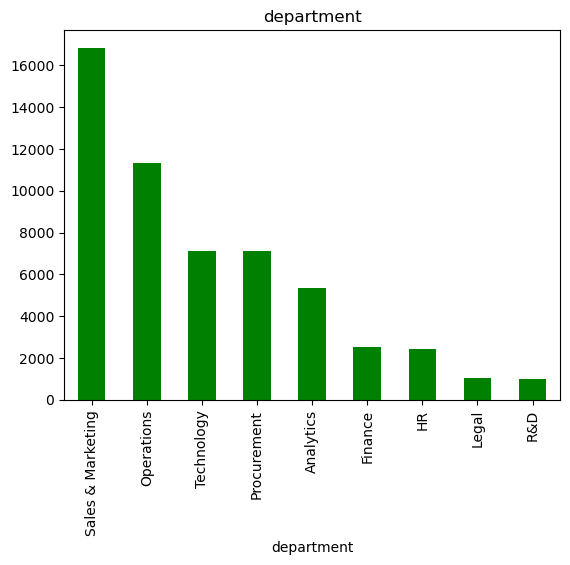

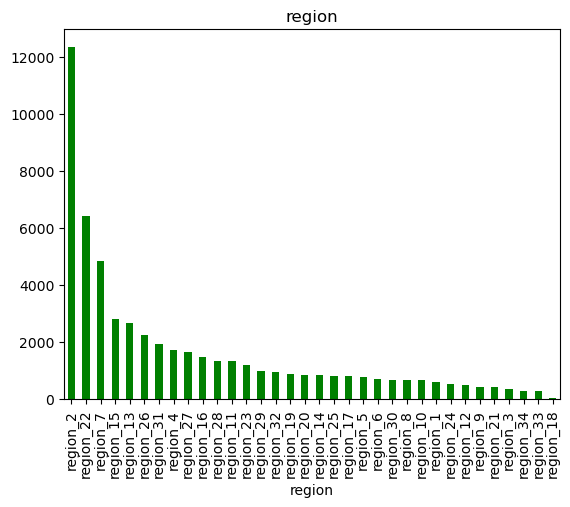

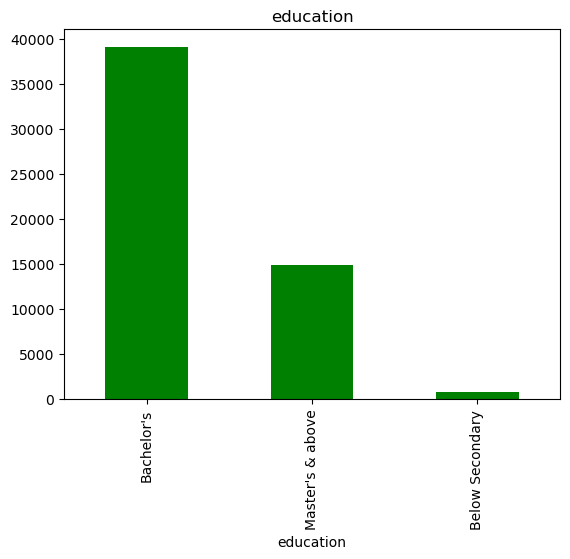

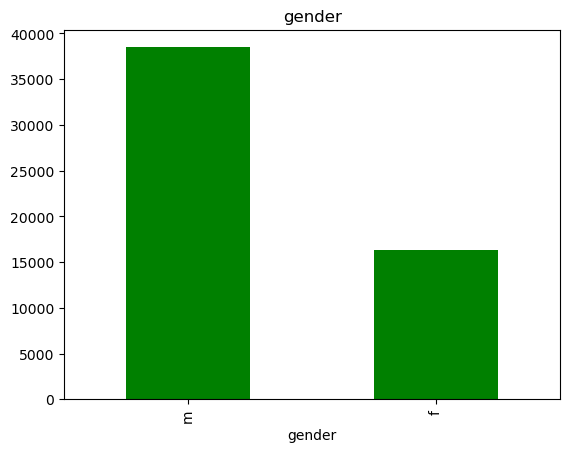

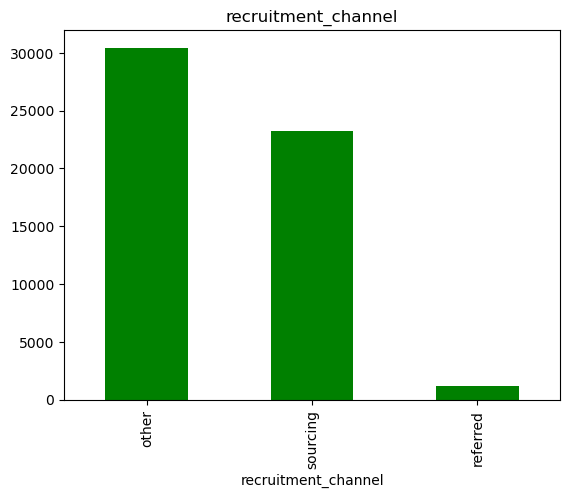

In [156]:
# columns=cat_columns
for i in cat_columns:
    tcd=hr[i].value_counts()
    tcd.plot(kind='bar',color='green')
    plt.title(f"{i}")
    plt.show() 


    

**count_plot**

In [157]:
cat_columns

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [159]:
#1 department_region
department_region=pd.crosstab(hr['department'],hr['region'])
department_region

region,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
department,,,,,,,,,,,,,,,,,,,,,
Analytics,76,26,128,37,133,48,234,59,26,0,...,262,192,3,47,135,49,51,389,48,83
Finance,7,13,57,10,87,23,76,27,1,0,...,77,64,2,6,100,11,44,220,19,9
HR,7,15,41,9,83,16,67,37,19,0,...,74,65,2,4,46,12,12,236,12,0
Legal,1,0,22,12,32,0,18,11,3,0,...,33,10,0,8,11,18,7,100,2,3
Operations,61,87,281,153,540,192,965,294,92,3,...,416,283,23,67,468,76,160,884,239,34
Procurement,18,152,174,62,425,118,360,203,349,0,...,196,13,26,37,191,134,57,673,114,15
R&D,0,2,47,2,26,2,31,10,2,0,...,30,10,0,0,68,1,2,94,17,1
Sales & Marketing,367,235,414,178,923,321,838,572,185,28,...,623,284,77,105,546,221,268,1441,148,243
Technology,73,118,151,37,399,107,219,252,119,0,...,224,24,136,18,138,244,89,806,56,32


<Figure size 1400x300 with 0 Axes>

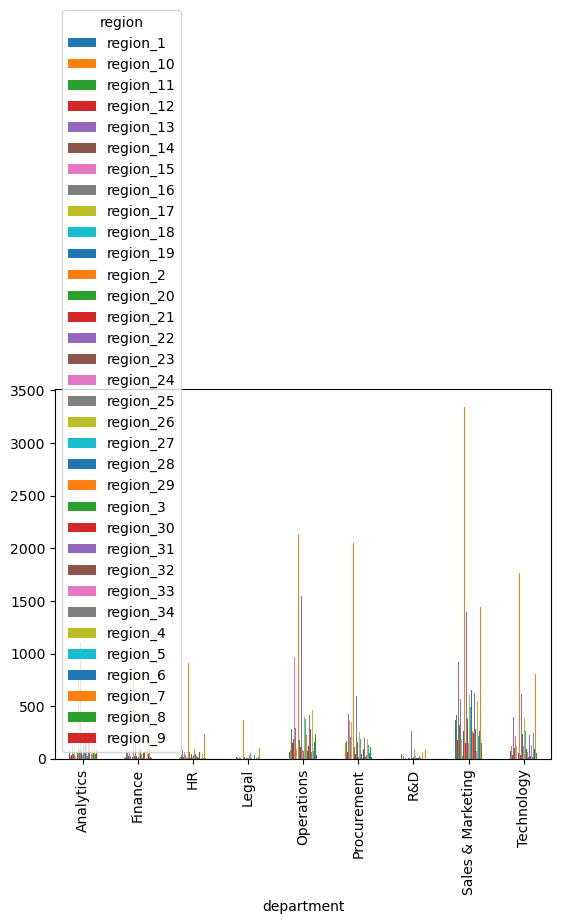

In [170]:
plt.figure(figsize=(14,3))
department_region.plot(kind='bar')
plt.show()


<Figure size 1000x500 with 0 Axes>

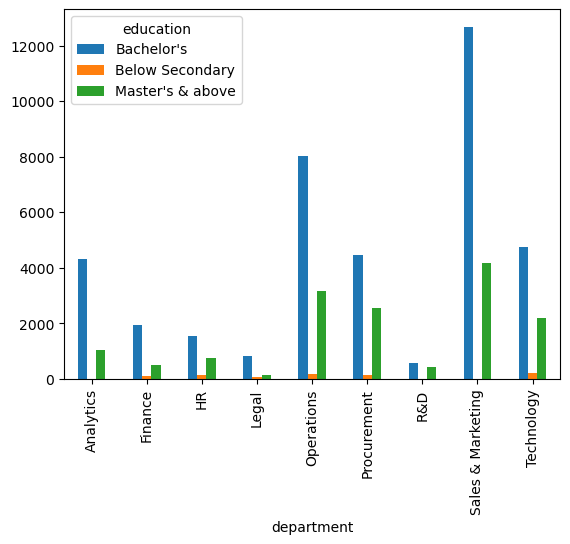

In [169]:
#2 department_education

plt.figure(figsize=(10,5))

department_education=pd.crosstab(hr['department'],hr['education'])

department_education.plot(kind='bar')
plt.show()



<Axes: xlabel='department'>

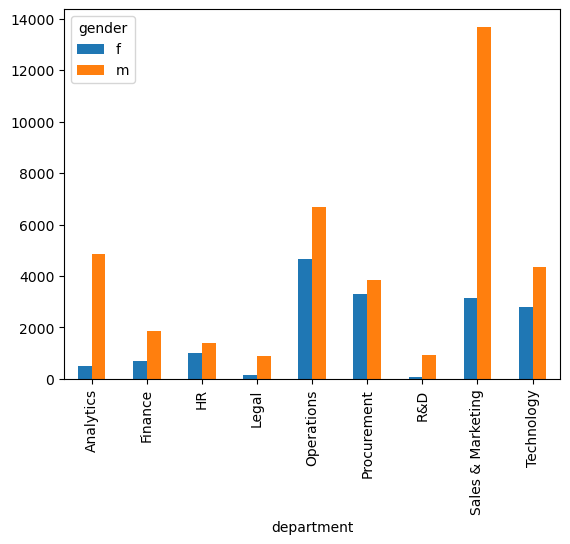

In [168]:
#department_gender

department_gender=pd.crosstab(hr['department'],hr['gender'])
department_gender.plot(kind='bar')


In [ ]:
#department_recruitment_channel

<Axes: xlabel='department'>

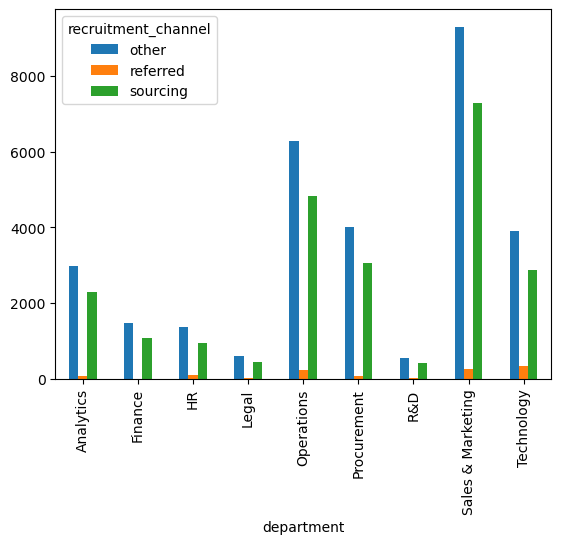

In [171]:
department_recruitmentchannel=pd.crosstab(hr['department'],hr['recruitment_channel'])
department_recruitmentchannel.plot(kind='bar')

**Pie-chart**

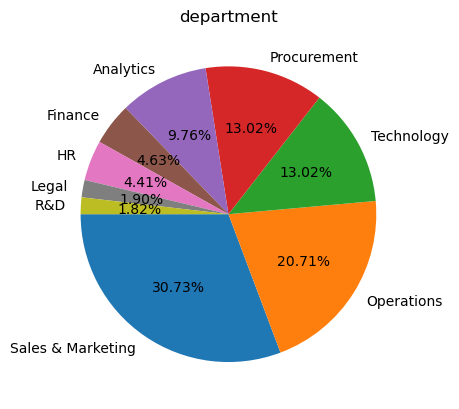

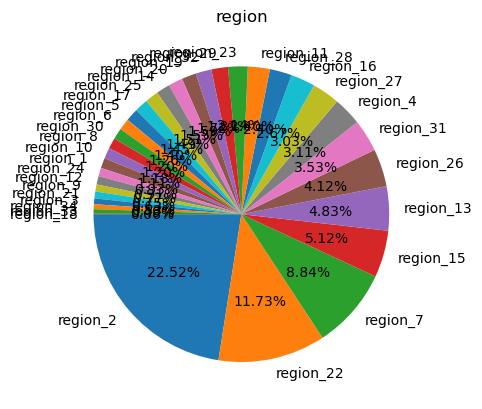

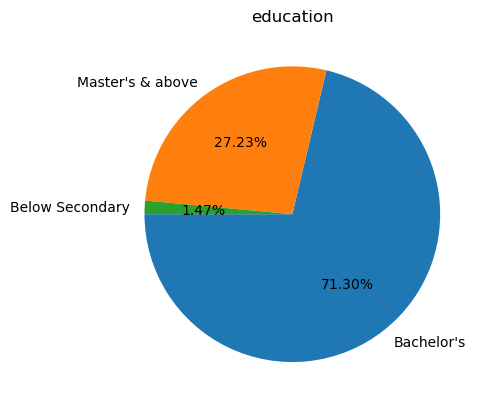

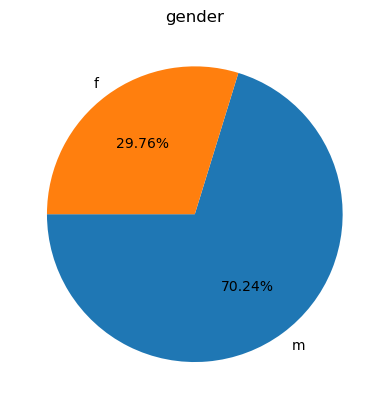

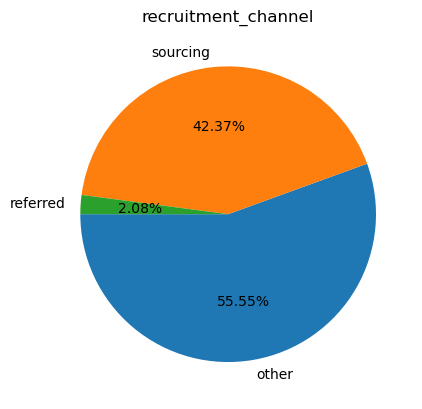

In [179]:
for i in cat_columns:
    keys=hr[i].value_counts().keys()
    values=hr[i].value_counts().values
    plt.pie(values,
            labels=keys,
            autopct="%0.2f%%",
           startangle=180)
    plt.title(f"{i}")
    plt.show()

**Numerical_Data_Analysis**

In [180]:
num_columns

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

**Describe**

In [184]:
num_cols=hr.describe()
num_cols

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [190]:
num_columns

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

**dropping columns**

In [201]:
hr.describe()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,3.304481,0.351974,0.023172,0.085170
std,0.609264,1.214770,0.477590,0.150450,0.279137
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,0.000000,0.000000
max,10.000000,5.000000,1.000000,1.000000,1.000000


In [208]:
hr.drop(["department","region"],axis=1,inplace=True)

In [213]:
hr.drop(["education","gender","recruitment_channel"],axis=1,inplace=True)

In [214]:
hr

,KPIs_met >80%,awards_won?,is_promoted
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
54803,0,0,0
54804,0,0,0
54805,1,0,0
54806,0,0,0


In [215]:
num_columns

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [225]:
num_columns

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [236]:
num_df=hr.describe()
num_df

,KPIs_met >80%,awards_won?,is_promoted
count,54808.000000,54808.000000,54808.000000
mean,0.351974,0.023172,0.085170
std,0.477590,0.150450,0.279137
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [237]:
for i in num_df:
    print(i)

KPIs_met >80%
awards_won?
is_promoted


**histogram**

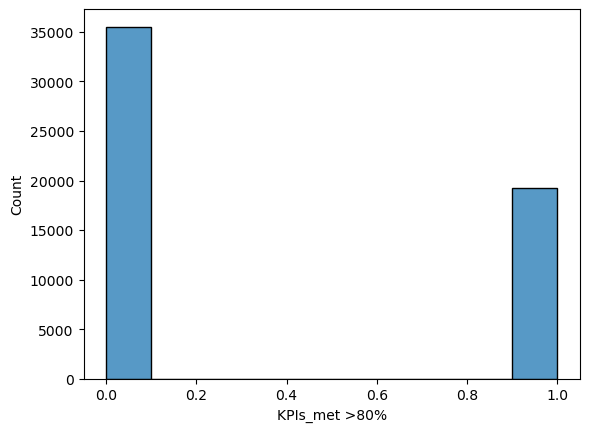

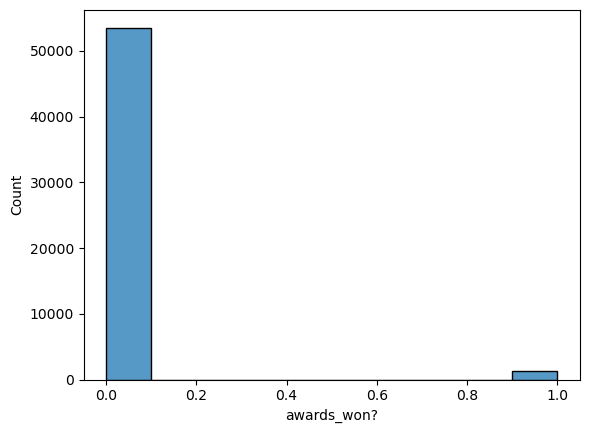

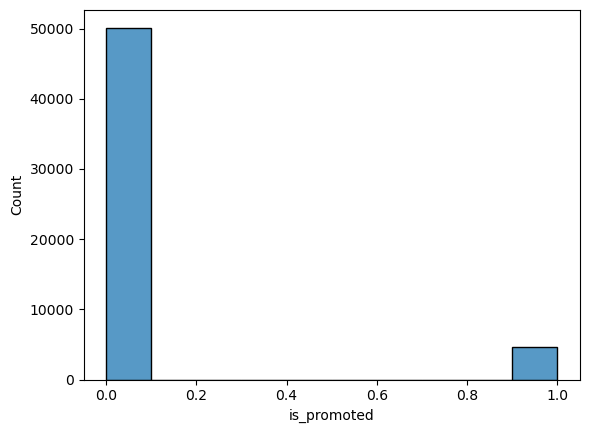

In [240]:
for i in num_df:
    sns.histplot(hr[i],bins=10,kde=False)
    plt.show()